In [57]:
import pandas as pd
import os
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import pickle

In [48]:
df = pd.read_csv('../data/preprocessed.csv')

In [49]:
df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,y
0,1.0,1.0,0.271174,0.125,0.000000,0.014151,1.0,0
1,0.0,0.0,0.472229,0.125,0.000000,0.139136,0.5,1
2,1.0,0.0,0.321438,0.000,0.000000,0.015469,1.0,1
3,0.0,0.0,0.434531,0.125,0.000000,0.103644,1.0,1
4,1.0,1.0,0.434531,0.000,0.000000,0.015713,1.0,0
...,...,...,...,...,...,...,...,...
886,0.5,1.0,0.334004,0.000,0.000000,0.025374,1.0,0
887,0.0,0.0,0.233476,0.000,0.000000,0.058556,1.0,1
888,1.0,0.0,0.367932,0.125,0.333333,0.045771,1.0,0
889,0.0,1.0,0.321438,0.000,0.000000,0.058556,0.5,1


In [50]:
X = df[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']].values
y = df['y'].values

In [51]:
X_train, X_val, y_train, y_val = train_test_split(X,y, train_size=0.8)

In [55]:
#Deep learning model

model = keras.Sequential([
    layers.Dense(8, activation='relu', input_shape=[7]),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation ='relu'),
    layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=8,
    epochs=50,
    verbose=0, # hide the output because we have so many epochs
)

Best Validation Loss: 0.4198
Best Validation Accuracy: 0.8268


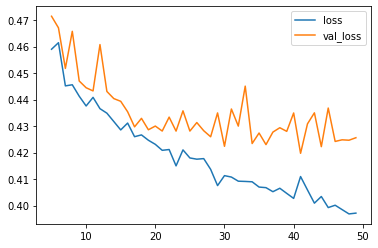

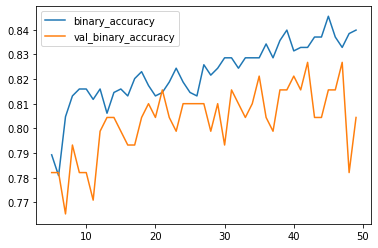

In [56]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

In [61]:
weigh= model.get_weights()
p = open('../static/models/nn_weigh.pkl','wb')
pickle.dump(weigh,p)
p.close()